Pipelines de procesamiento de datos:
Escalamiento Lineal
1. ¿Por qué usarlos?: Eficientes ya que se encuentran entre el rango de [-1, 1]

2. Hay diferentes tipos: max-min, Clipping, Z-score, Winsorizing, etc

3. ¿Cuando usarlos?: Data simétrica o uniformemente distribuida

-------------------------------------------------------------

Tipos de escalamiento:

1. min - max: X ---> Xs  <----> Fórmula: ((2x-min-max)/(max-min))

2. Clipping: Fuerza a todos los datos por fuera a convertirse a los valores mínimos o máximos.

3. Z-Score: 
[x1...xn] Esto consiste en volver los datos a la distribución normal estándar. Zx = (X-miu)/desvest() 

Transformaciones no lineales:
1. ¿Por qué usarlos? 
Datos fuertemente sesgados, no simétricos.
2. Hay diferentes tipos: Logarítmos, sigmoides, polinomiales, etc.
3. ¿Cuando se usan? Antes de realizar el escalamiento lineal.

In [3]:
#Importación de módulos importantes
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import timeit
from sklearn import datasets, linear_model
X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:, None, 2]

In [5]:
#Reglas de escalamientos
max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - max_raw - min_raw)/(max_raw - min_raw)

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

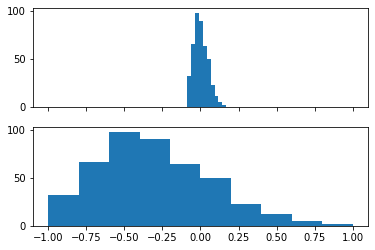

In [6]:
#Creando una figura en matplotlib
fig, axs = plt.subplots(2, 1, sharex= True)
axs[0].hist(raw)
axs[1].hist(scaled)

In [7]:
#Modelos para entrenamiento
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

In [8]:
raw_time = timeit.timeit(train_raw, number = 100)
scaled_time = timeit.timeit(train_scaled, number = 100)
print(f'train raw: {raw_time}')
print(f'scaled raw: {scaled_time}')

train raw: 0.054791099999988546
scaled raw: 0.021021900000050664


In [18]:
#Haciendo con el Z score, calculando las desviaciones y medias:
mean_raw = raw.mean()
sd_raw = np.sqrt(raw.var())

scaledZ = (raw - mean_raw)/sd_raw

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1.89792941, -1.34956464, -0.80119987, -0.2528351 ,  0.29552967,
         0.84389444,  1.39225921,  1.94062398,  2.48898875,  3.03735352,
         3.58571828]),
 <BarContainer object of 10 artists>)

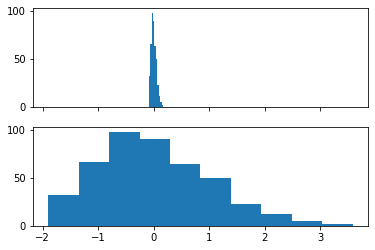

In [19]:
#Graficando esta locura
fig, axs = plt.subplots(2, 1, sharex= True)
axs[0].hist(raw)
axs[1].hist(scaledZ)

In [20]:
#Modelos para entrenamiento
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaledZ, y)

In [22]:
raw_time = timeit.timeit(train_raw, number = 1000)
scaled_time = timeit.timeit(train_scaled, number = 1000)
print(f'train raw: {raw_time}')
print(f'scaled raw: {scaled_time}')

train raw: 0.3114786000001004
scaled raw: 0.19488499999988562


Ahora metiendonos con transformaciones no lineales, vamos a hacer esta vaina con tangente hiperbólica

In [23]:
df = pd.read_csv('cars.csv')

<AxesSubplot:>

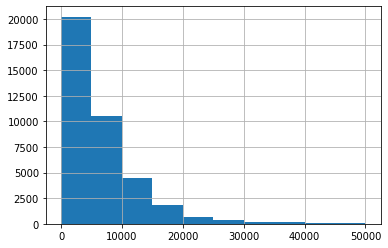

In [28]:
df.price_usd.hist()

<AxesSubplot:>

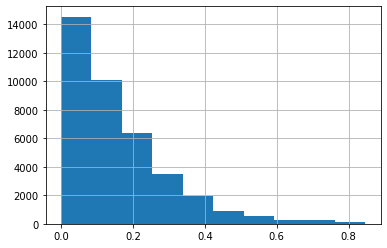

In [32]:
p = 40232
df.price_usd.apply(lambda x: np.tanh(x/p)).hist()